<a href="https://colab.research.google.com/github/Chiebukar/Deep-Learning/blob/main/dog_cat_classification_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
files.upload()

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d arnaudeq/cats-vs-dogs-5000

 99% 521M/527M [00:02<00:00, 249MB/s]
100% 527M/527M [00:02<00:00, 242MB/s]


In [4]:
!ls -d $PWD/*

/content/cats-vs-dogs-5000.zip	/content/kaggle.json  /content/sample_data


In [ ]:
!unzip \*.zip && rm *.zip

In [6]:
!ls -d $PWD/*

/content/dogs_cats_sample_5000	/content/kaggle.json  /content/sample_data


In [7]:
train_dir = 'dogs_cats_sample_5000/train'
validation_dir  = 'dogs_cats_sample_5000/valid'

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers

In [9]:
model = Sequential()
model.add(Conv2D(32, kernel_size = (3,3), activation='relu', input_shape = (150, 150, 3)))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(128, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(2,2))

model.add(Flatten())

model.add(Dense(512, activation ='relu'))
model.add(Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 512)       5

In [10]:
model.compile(loss= 'binary_crossentropy', optimizer= 'rmsprop', metrics=['accuracy'])

In [11]:
# create data generator object and set scaling
train_datagen = ImageDataGenerator(rescale = 1./255)
val_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(
                                                   train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary'
                                                   )

validation_generator = val_datagen.flow_from_directory(
                                                   validation_dir,
                                                   target_size = (150,150),
                                                   batch_size = 20,
                                                   class_mode = 'binary'
                                                   )

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [12]:
for data_batch, labels_batch in train_generator:
  print('data batch shape', data_batch.shape)
  print('data label shape', labels_batch.shape)
  break

data batch shape (20, 150, 150, 3)
data label shape (20,)


In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=100, 
                              epochs=30, validation_data=validation_generator, 
                              validation_steps=50)


In [14]:
model.save('cats_and_dogs_small_1.h5')

In [15]:
acc = history.history['accuracy'] 
val_acc = history.history['val_accuracy'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1)

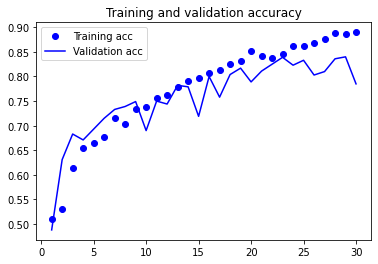

In [16]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy') 
plt.legend()

plt.show()

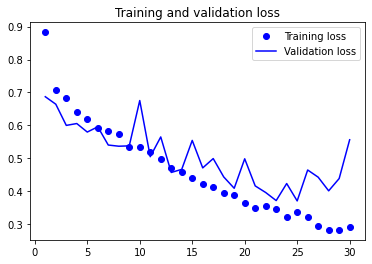

In [17]:
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend() 

plt.show()

Data Augmentation

In [18]:
train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=40, width_shift_range=0.2, 
                                   height_shift_range=0.2, shear_range=0.2, zoom_range=0.2, 
                                   horizontal_flip=True)

val_datagen = ImageDataGenerator(rescale=1./255)

In [19]:
train_generator= train_datagen.flow_from_directory(train_dir,
                                                   target_size = (150,150),
                                                   batch_size = 32,
                                                   class_mode = 'binary'
                                                   )
validation_generator= val_datagen.flow_from_directory(validation_dir,
                                                      target_size = (150,150),
                                                      batch_size = 32,
                                                      class_mode = 'binary'
                                                     )

Found 10000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [20]:
for data_batch, labels_batch in train_generator:
  print('data batch shape', data_batch.shape)
  print('data label shape', labels_batch.shape)
  break

data batch shape (32, 150, 150, 3)
data label shape (32,)


In [21]:
model = Sequential() 
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 

model.add(Conv2D(128, (3, 3), activation='relu')) 
model.add(MaxPooling2D((2, 2))) 

model.add(Flatten()) 
model.add(Dropout(0.5))

model.add(Dense(512, activation='relu')) 
model.add(Dense(1, activation='sigmoid')) 
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(lr=1e-4), metrics=['acc'])

In [ ]:
history = model.fit_generator(train_generator, steps_per_epoch=100, 
                              epochs=50, validation_data=validation_generator, 
                              validation_steps=50)

In [23]:
model.save('cats_and_dogs_small_2.h5')

In [24]:
acc = history.history['acc'] 
val_acc = history.history['val_acc'] 
loss = history.history['loss'] 
val_loss = history.history['val_loss'] 
epochs = range(1, len(acc) + 1)

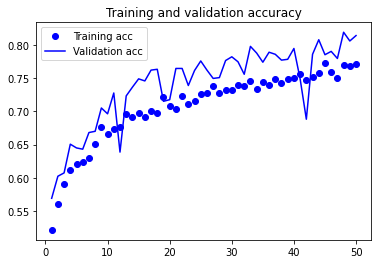

In [25]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy') 
plt.legend()

plt.show()

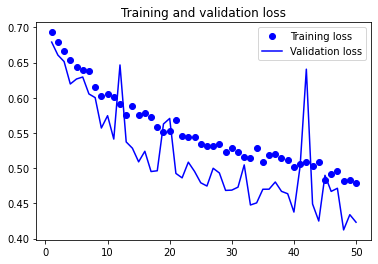

In [26]:
plt.plot(epochs, loss, 'bo', label='Training loss') 
plt.plot(epochs, val_loss, 'b', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend() 

plt.show()

